In [67]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
def get_plot(X, Y, w, b, figsize=(6,4)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.scatter(X, Y)
    ax.plot([min(X), max(X)], [w*min(X) + b, w*max(X) + b], 'red')
    ax.set_title(f'Model with w: {round(w, 6)} b: {round(b, 6)}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.show()

## Data

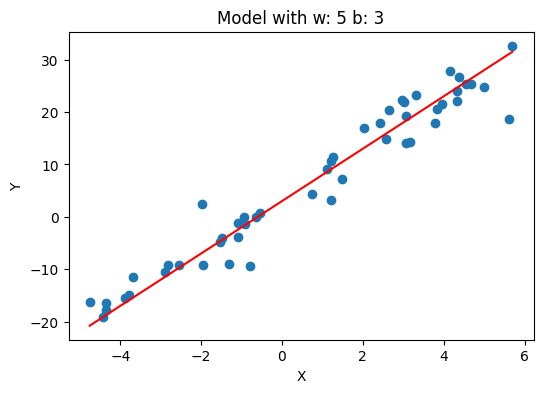

In [69]:
# Generate Data
# y = 5x + 3

N = 50
noise = 4
w_orig, b_orig = 5, 3

X = np.random.uniform(-5, 6, (N, 1))
Y = w_orig*X + b_orig + np.random.normal(0, noise, (N, 1))

get_plot(X, Y, w_orig, b_orig)

## Stochastic Gradient Descent

In [70]:
class SGD:
    def __init__(self, lr=0.01, epochs=2, batch_size=5):
        # Hyper Parameters
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        # Parameters
        self.w = np.random.randn()
        self.b = np.random.randn()
        # Callback Variables
        self.param_history = []
        self.loss_history = []

    def forward(self, x):
        return self.w*x + self.b

    def loss(self, y, y_pred):
        return 0.5*np.mean((y_pred - y)**2)

    def train(self, X, Y):
        # # Make data lenght multiple of batch size [Drop Extra records]
        # X = X[:-(X.shape[0]%self.batch_size)]
        # Y = y[:-(y.shape[0]%self.batch_size)]
        # Make Batches
        X = X.reshape((-1, self.batch_size, 1))
        Y = Y.reshape((-1, self.batch_size, 1))
        # Get Run Count in 1 Epoch
        n_runs = X.shape[0]//self.batch_size

        for i in range(self.epochs):
            local_loss = []
            for (x, y) in zip(X, Y):
                y_pred = self.forward(x)
                loss = self.loss(y, y_pred)
                # Gradient Update
                self.w -= self.lr * np.mean((y_pred - y)*x)
                self.b -= self.lr * np.mean(y_pred - y)
                # Save History
                self.loss_history.append(loss)
                self.param_history.append((self.w, self.b))

In [71]:
obj = SGD(lr = 0.05, epochs = 5, batch_size = 10)
obj.train(X, Y)

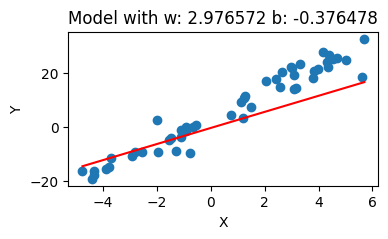

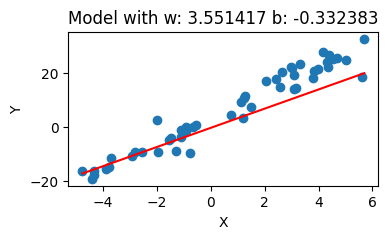

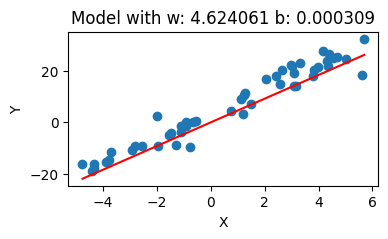

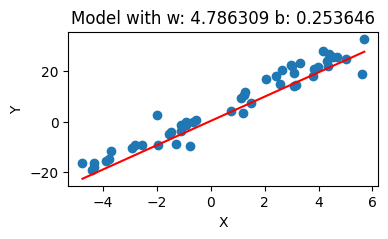

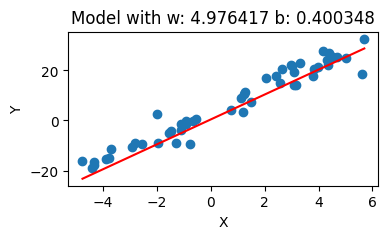

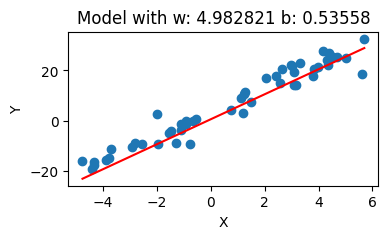

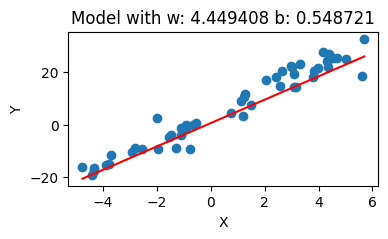

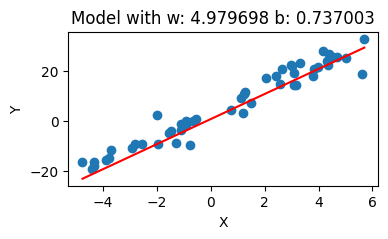

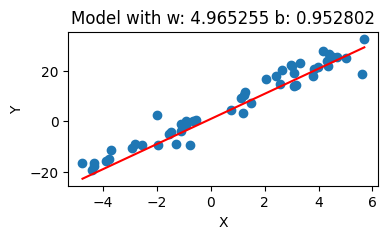

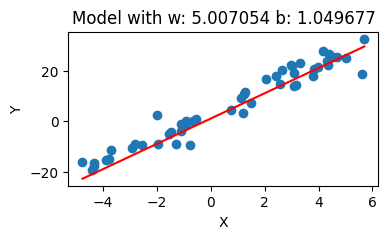

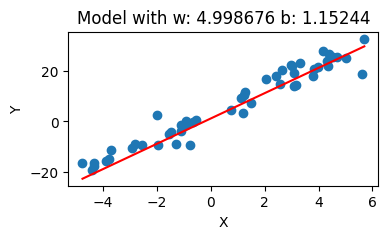

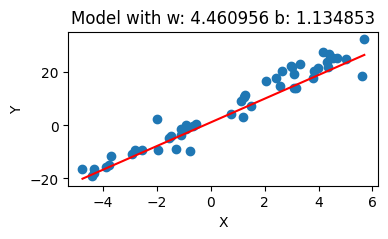

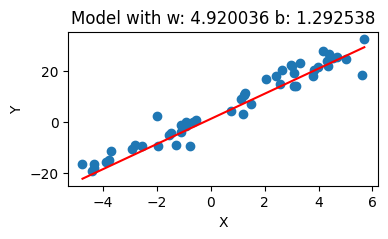

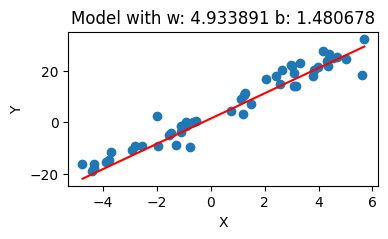

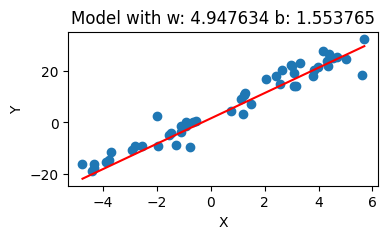

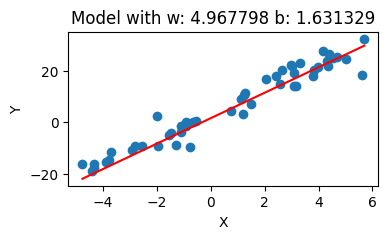

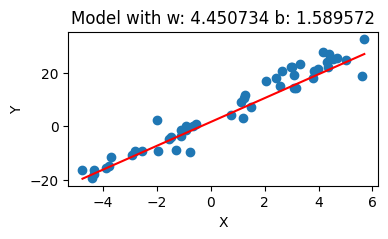

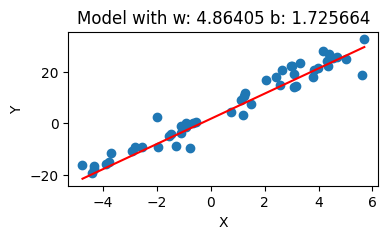

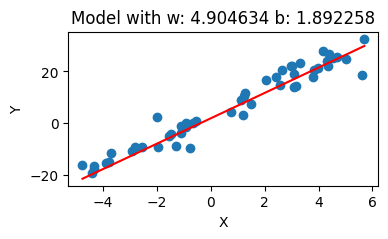

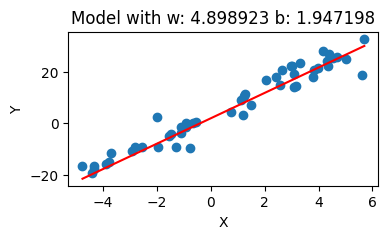

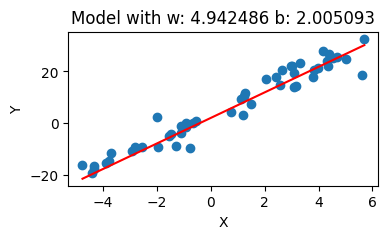

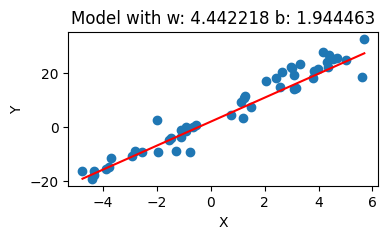

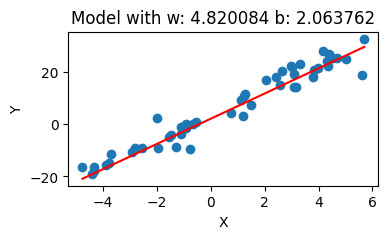

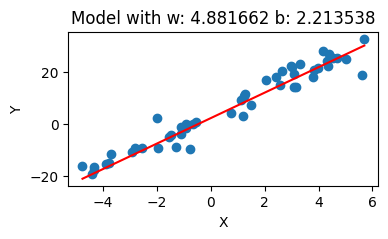

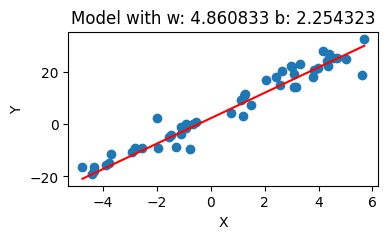

In [72]:
for (w,b) in obj.param_history:
    get_plot(X, Y, w, b, figsize=(4, 2))

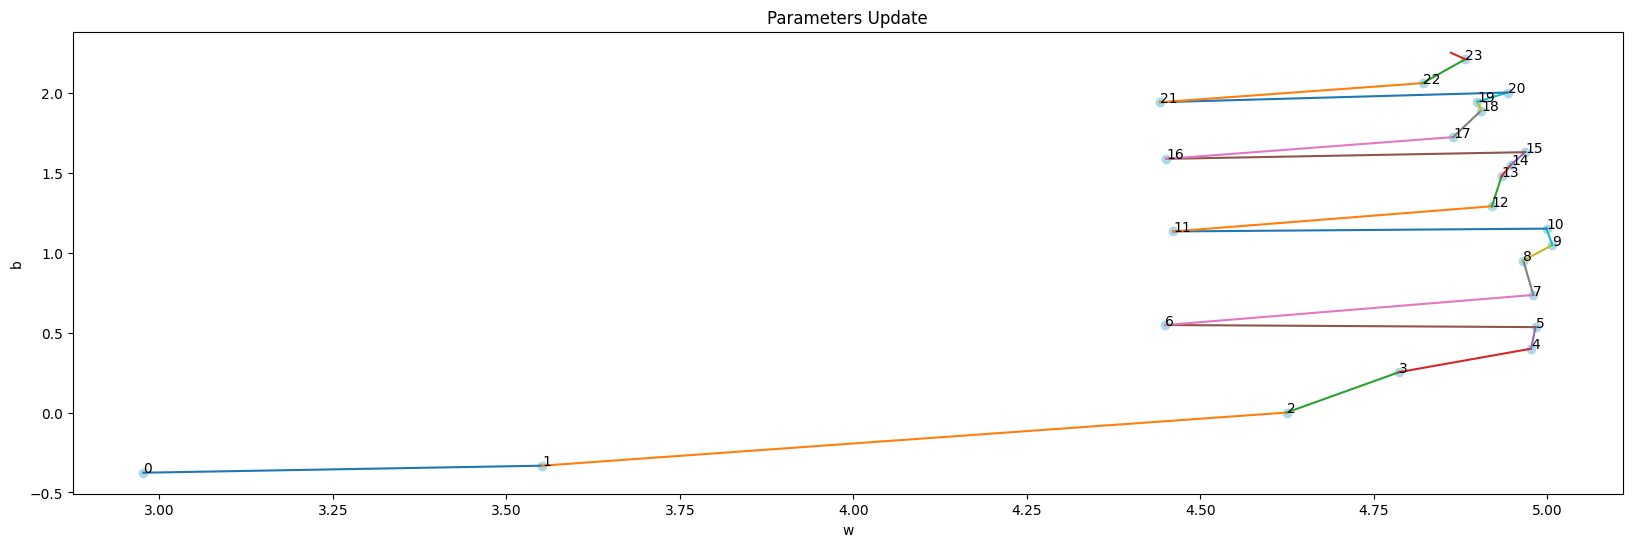

In [74]:
# Jumps in Parameter Space

plt.figure(figsize=(20, 6))

for idx, i in enumerate(range(0, len(obj.param_history)-1, 1)):
    w, b = obj.param_history[i]
    w_next, b_next = obj.param_history[i+1]
    plt.plot([w, w_next], [b, b_next])
    plt.scatter(w, b, color='lightblue')
    plt.annotate(idx, (w, b))
plt.xlabel('w')
plt.ylabel('b')
plt.title('Parameters Update')
plt.show()

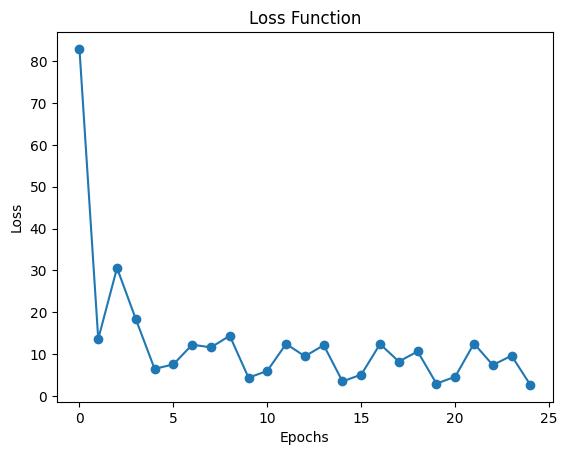

In [76]:
# Loss function

plt.scatter(range(len(obj.loss_history)), obj.loss_history)
plt.plot(range(len(obj.loss_history)), obj.loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Function")
plt.show()